In [58]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df_movie_raw = pd.read_csv('movies.csv', index_col = 'movieId')
df_rating_raw = pd.read_csv('ratings.csv', index_col = 'movieId')
df_keywords_raw = pd.read_csv('keywords.csv')

In [4]:
#Лепим фрейм
merges_frame = pd.concat([df_rating_raw, df_movie_raw], axis=1, join='inner')
df = merges_frame[['title', 'rating']]

In [320]:
#делаем сводную таблицу
df_fp_rating = pd.pivot_table(df,  
                   values = ['rating'],
                   index = ['title'],
                   aggfunc=(np.mean),    
                  )

## Задание 1

In [321]:
def categoryes(row):
    if row['rating'] <= 2:
        return str('низкий рейтинг')
    elif row['rating'] > 2 and row['rating'] <= 4:
        return str('средний рейтинг')
    else:
        return str('высокий рейтинг')
    
df_fp_rating['class'] = df_fp_rating.apply(categoryes, axis=1)
df_fp_rating[['rating', 'class']].head()

,rating,class
title,,
'71 (2014),4.0,средний рейтинг
'Hellboy': The Seeds of Creation (2004),4.0,средний рейтинг
'Round Midnight (1986),3.5,средний рейтинг
'Salem's Lot (2004),5.0,высокий рейтинг
'Til There Was You (1997),4.0,средний рейтинг


## Задание 2

In [322]:
geo_data_raw = {
    'Центр': ['москва', 'тула', 'ярославль'],
    'Северо-Запад': ['петербург', 'псков', 'мурманск'],
    'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']
}

In [348]:
#sepp
def phrase_to_word(row):
    return list(row['keyword'].split(' '))

df_keywords_raw['sepp'] = df_keywords_raw.apply(phrase_to_word, axis=1)

# умнее ничего придумать не смог -_-
def geo_cl(row):
    if 'москва' in row['keyword'] or 'тула' in row['keyword'] or 'ярославль' in row['keyword']:
        return 'Центр'
    elif 'петербург' in row['keyword'] or 'псков' in row['keyword'] or 'псков' in row['keyword']:
        return 'Северо-Запад'
    elif 'владивосток' in row['keyword'] or 'сахалин' in row['keyword'] or 'хабаровск' in row['keyword']:
        return 'Дальний Восток'
    else:
        return 'undefined'
    
# Все-таки придумал (ищу пересечения списков)
def geo_cl_v2(row):
    if len(list(set(geo_data_raw['Центр']) & set(row['sepp']))) > 0:
           return 'Центр'
    elif len(list(set(geo_data_raw['Северо-Запад']) & set(row['sepp']))) > 0:
           return 'Северо-Запад'
    elif len(list(set(geo_data_raw['Центр']) & set(row['sepp']))) > 0:
           return 'Дальний Восток'
    else:
        return 'Нет ключевых слов'
    
df_keywords_raw['region'] = df_keywords_raw.apply(geo_cl_v2, axis=1)
df_keywords_raw.loc[df_keywords_raw['region'] != 'Нет ключевых слов'].head()

,keyword,shows,region,sepp
127,авито москва,979292,Центр,"[авито, москва]"
370,авито ру санкт петербург,425134,Северо-Запад,"[авито, ру, санкт, петербург]"
849,авито ярославль,209581,Центр,"[авито, ярославль]"
1236,банк санкт петербург,174375,Северо-Запад,"[банк, санкт, петербург]"
1259,москва,153050,Центр,[москва]


## Задание 3

In [95]:
Total = df
years = list([i for i in range(1950, 2011)])

In [96]:
def production_year(title):
    for year in years:
        if str(year) in title:
            return str(year)
        
    return str(1900)    

Total['year'] = Total['title'].apply(production_year)

In [110]:
pvt = Total.pivot_table(index=['year'], values = 'rating', aggfunc='mean')
pvt_sorted = pvt.sort_values(by = ['rating'], ascending = False)
pvt_sorted.head(10)

,rating
year,
1957,4.039535
1954,4.009191
1962,3.969466
1952,3.953125
1972,3.944293
1964,3.940160
1974,3.935622
1967,3.922572
1975,3.879121


<AxesSubplot:xlabel='year', ylabel='rating'>

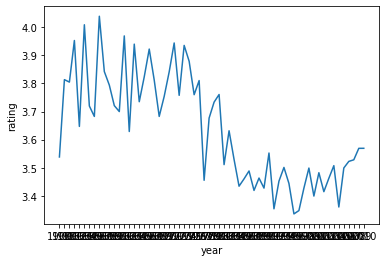

In [137]:
pvt_sorted = pvt.sort_values(by = ['year'], ascending = True).head(100)
sns.lineplot(x = pvt_sorted.index,
             y = pvt_sorted.rating)

#Вывод: с каждым годом кино все хуже по мнению зрителей -> гипотеза относительно этого датасета верна